### fitting J mag, H mag, Ks mag, and parallax

In [1]:
from jaxstar import mistfit
from jax import random
import arviz, corner
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
mf = mistfit.MistFit()

In [4]:
# observed Kmag, Teff, Fe/H, parallax (mas)
jmag_obs, jmag_err, hmag_obs, hmag_err, kmag_obs, kmag_err, parallax_obs, parallax_err\
= [ 7.844, 0.021, 7.255, 0.020, 7.104, 0.017, 35.666, 0.014]

In [5]:
# probably need to know Fe/H for accurete modeling
feh_est, feh_err = -0.58, 0.18

In [6]:
mf.set_data(['jmag', 'hmag', 'kmag', 'parallax', 'feh'],\
            [jmag_obs, hmag_obs, kmag_obs, parallax_obs, feh_est],\
            [jmag_err, hmag_err, kmag_err, parallax_err, feh_err])

In [7]:
# setup HMC
ns = 5000
mf.setup_hmc(num_warmup=ns, num_samples=ns)

In [8]:
# run
rng_key = random.PRNGKey(0)
mf.run_hmc(rng_key, linear_age=True, flat_age_marginal=False, nodata=False)

sample: 100%|█████████████████████████████████| 10000/10000 [00:15<00:00, 653.08it/s, 219 steps of size 4.86e-03. acc. prob=0.96]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
       age      6.90      3.87      6.93      0.34     12.41    805.89      1.00
  distance      0.03      0.00      0.03      0.03      0.03   3935.19      1.00
       eep    315.55     23.07    322.93    282.84    340.48    665.25      1.00
       feh     -0.61      0.11     -0.61     -0.77     -0.42   1378.55      1.00

Number of divergences: 0


In [9]:
mcmc = mf.mcmc
samples = mf.samples

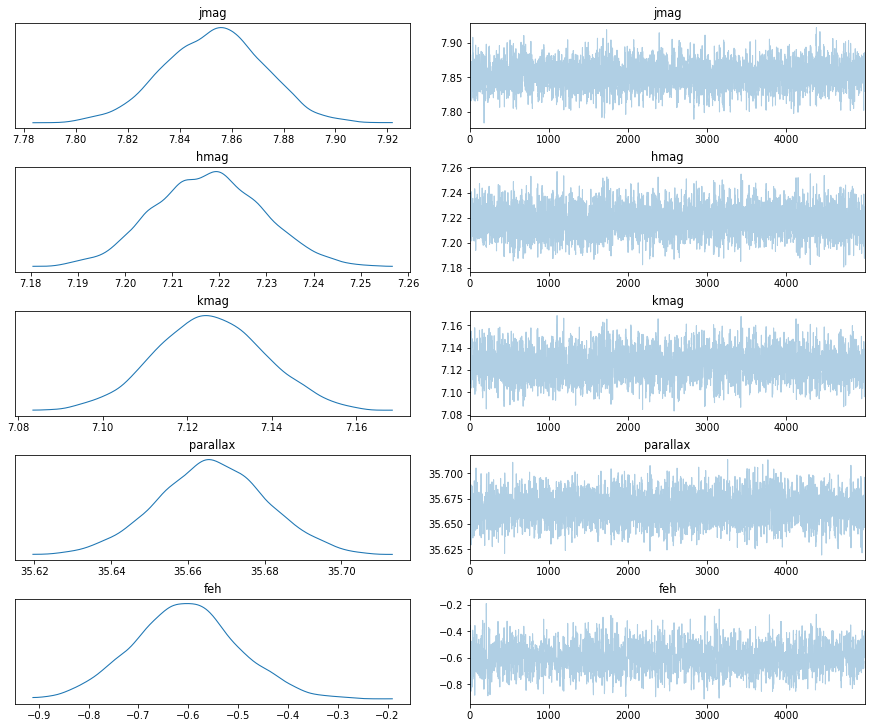

In [10]:
# trace plot
fig = arviz.plot_trace(mcmc, var_names=mf.obskeys)

In [11]:
# keys and observed values for corner plot
outkeys = mf.obskeys + ['mass', 'radius', 'age', 'teff', 'logg', 'eep']
obsvals = mf.obsvals + [None] * (len(outkeys) - len(mf.obskeys))

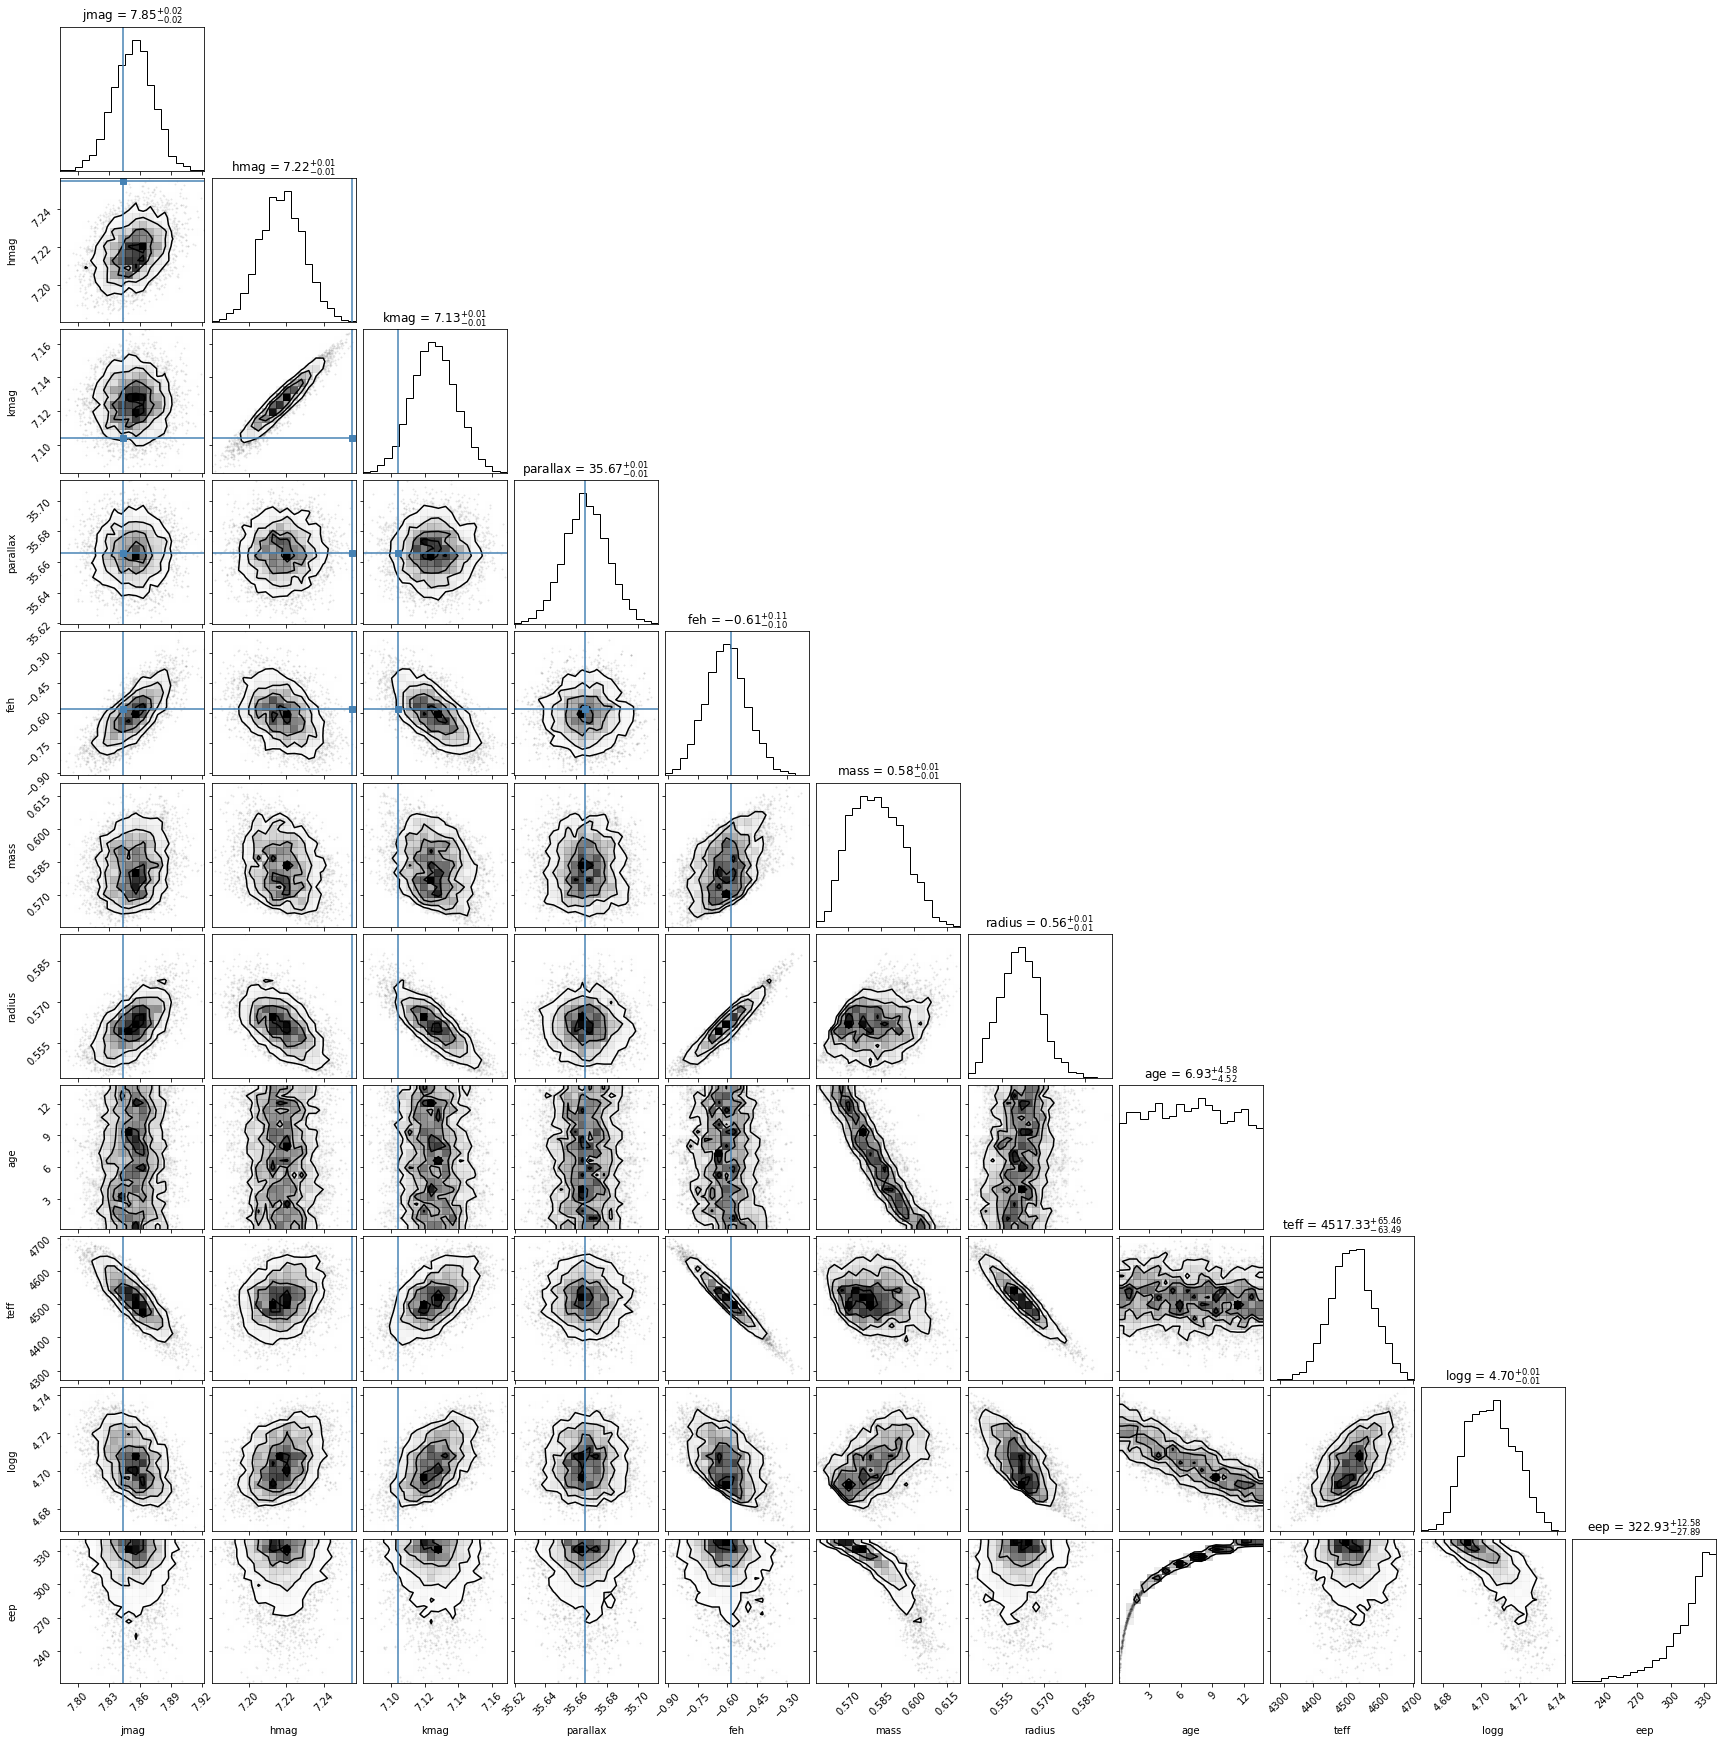

In [12]:
params = pd.DataFrame(data=dict(zip(outkeys, [samples[k] for k in outkeys])))
fig = corner.corner(params, show_titles="%.2f", truths=obsvals)